# Ford GoBike Dataset
## by: Ochieng' David Agit

## Introduction
#### A brief introduction
> The information in this dataset was obtained from <b> Ford GoBike System database </b>. It provides information of individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
  


## Preliminary Wrangling


### Import the needed libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# setting up colours
base_color= sb.color_palette()[0]


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# loding my dataset
df = pd.read_csv('fordgobike-tripdata.csv')

In [4]:
# inspecting the features of the dataset
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


In [5]:
# first five columns of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# checking for null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# finding duplicates
df.duplicated().sum()

0

In [8]:
# getting additional description for stat
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


In [9]:
print(df.columns)

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')


In [10]:
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


#### Issues found

1. Many colums have the wrong data types.
    - duration_sec', 'start_time', 'end_time'
    - member_birth_year  
2. There are many missing values in te dataset.


### What is the structure of your dataset?

> This dataset consists of 183412 rows and 16 columns.

> The columns herein include:
 duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'

> Most of the variables are numeric with few qualitative nomianl variables.
    

### What is/are the main feature(s) of interest in your dataset?

> From my point of view I'll base my interest on the gender, user-type, age, and duration of ride(time)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. member_gender
2. user_type
3. member_birth_year
4. duration_sec
5. start_time
6. end_time

# Cleaning

In [5]:
# make a copy of the original dataset
ford_df =df.copy()
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# correct the date format 
ford_df['start_time'] = pd.to_datetime(ford_df['start_time'])
ford_df['end_time'] = pd.to_datetime(ford_df['end_time'])

In [7]:
#converting the duration sec to duration mins
ford_df['duration_sec'] = ford_df['duration_sec']/60
ford_df.rename(columns= {"duration_sec":"duration_min"}, inplace = True )

In [8]:
# creating new columns for hour of the day, day of the week and month
ford_df['start_date'] = ford_df.start_time.dt.strftime('%Y-%m-%d')
ford_df['start_hourofday'] = ford_df.start_time.dt.strftime('%H')
ford_df['start_dayofweek'] = ford_df.start_time.dt.strftime('%A')
ford_df['start_month'] = ford_df.start_time.dt.strftime('%B')

In [9]:
# test
ford_df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hourofday,start_dayofweek,start_month
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17,Thursday,February
1,708.683333,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,18,Thursday,February
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12,Thursday,February
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17,Thursday,February
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23,Thursday,February


In [10]:
# dropping all null values
ford_df.dropna(axis=0, inplace=True)

In [11]:
#testing
ford_df.isnull().sum()

duration_min               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
start_hourofday            0
start_dayofweek            0
start_month                0
dtype: int64

In [12]:
# getting the ages of the members and convert it to integer 
ford_df['age'] = 2022 - ford_df['member_birth_year']
ford_df['age'] = ford_df['age'].astype(int)
ford_df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hourofday,start_dayofweek,start_month,age
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2019-02-28,17,Thursday,February,38
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2019-02-28,12,Thursday,February,50
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2019-02-28,17,Thursday,February,33
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23,Thursday,February,48
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,2019-02-28,23,Thursday,February,63


In [13]:
# Changing the user_type, member_gender to category format
ford_df.user_type = ford_df.user_type.astype('category')
ford_df.member_gender = ford_df.member_gender.astype('category')
ford_df.bike_share_for_all_trip = ford_df.bike_share_for_all_trip.astype('category')

In [14]:
ford_df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hourofday,start_dayofweek,start_month,age
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2019-02-28,17,Thursday,February,38
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2019-02-28,12,Thursday,February,50
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2019-02-28,17,Thursday,February,33
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23,Thursday,February,48
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,2019-02-28,23,Thursday,February,63


In [15]:
ford_df.columns

Index(['duration_min', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_date', 'start_hourofday', 'start_dayofweek', 'start_month',
       'age'],
      dtype='object')

In [16]:
# dropping columns that wont be of use
ford_df.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude', 'member_birth_year', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id'], axis=1, inplace=True)

# Storing the data

In [17]:
ford_df.to_csv('ford_df.csv', index=False)

In [18]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
duration_min               174952 non-null float64
user_type                  174952 non-null category
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
start_date                 174952 non-null object
start_hourofday            174952 non-null object
start_dayofweek            174952 non-null object
start_month                174952 non-null object
age                        174952 non-null int64
dtypes: category(3), float64(1), int64(1), object(4)
memory usage: 9.8+ MB


In [19]:
# make a copy of the ford_df for exploration puporses
ford_clean = ford_df.copy()
ford_clean.head()

,duration_min,user_type,member_gender,bike_share_for_all_trip,start_date,start_hourofday,start_dayofweek,start_month,age
0,869.750000,Customer,Male,No,2019-02-28,17,Thursday,February,38
2,1030.900000,Customer,Male,No,2019-02-28,12,Thursday,February,50
3,608.166667,Subscriber,Other,No,2019-02-28,17,Thursday,February,33
4,26.416667,Subscriber,Male,Yes,2019-02-28,23,Thursday,February,48
5,29.883333,Subscriber,Male,No,2019-02-28,23,Thursday,February,63


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Questions

   1. What is the distribution of member 'gender'?
   2. What is the distribution of member'user type'?
   3. What is the distribution of member'age'?
   4. What is the distribution of 'trip duration in minutes'?
   5. What is the distribution of 'trip duration over day hours'?
   6. What is the distribution of 'bike share for all trip'?




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### 1. What is the distribution of member 'gender'?

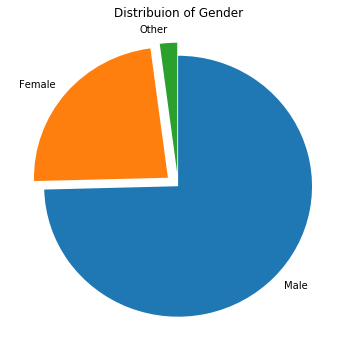

In [20]:

# plotting a piechart for gender distribution

plt.figure(figsize=(6,6))
gender_counts=ford_clean['member_gender'].value_counts(normalize=True)
label=['Male', 'Female', 'Other']
plt.pie(gender_counts, labels=label, startangle=90, explode=(0,0.1,0.1), counterclock=False)
plt.title('Distribuion of Gender')
plt.show()


Male      74.591888
Female    23.323540
Other      2.084572
Name: member_gender, dtype: float64


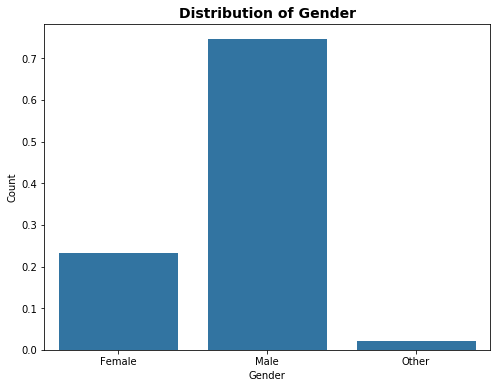

In [24]:
# plotting a bar graph for gender distibution
plt.figure(figsize=(8,6))
sb.barplot(x=gender_counts.index, y=gender_counts.values, color=base_color)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Distribution of Gender", fontsize=14, fontweight='bold')
print(gender_counts*100)
plt.show()


<b>Graph Conclusion:</b> Males represent 74.6 % of the riders, females follwing closely with a 23.3% whereas the rest represented 2.1% of the riders poppulation. This implies that there were more male riders than female riders.

### 2. What is the distribution of member 'user type'?

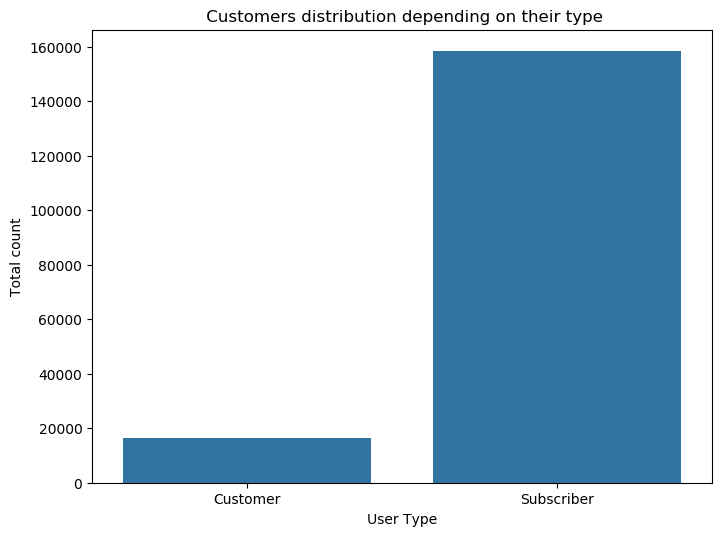

In [25]:
plt.figure(figsize = (8,6), dpi = 100)
sb.countplot(data=ford_clean, x='user_type', color=base_color)
plt.xlabel('User Type')
plt.ylabel('Total count')
plt.title(" Customers distribution depending on their type")

plt.show()

<b>Graph conclusion:</b> From the above plot we can conclude that most of the customers of Ford GoBike were their subscribers. The regular customers were not as many as the subscribers.

### 3. What is the distribution of member 'age'?

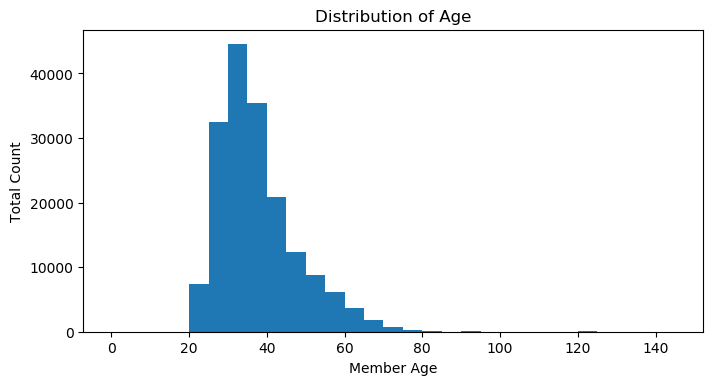

In [26]:
# Age Distribution 
plt.figure(figsize = (8,4), dpi = 100)

bins = np.arange(0, ford_clean['age'].max()+5, 5)
plt.hist(data=ford_clean, x='age', color=base_color, bins = bins)
plt.xlabel('Member Age')
plt.ylabel('Total Count')

plt.title("Distribution of Age")

plt.show()

In [27]:
#calculating the average users ages
def average(x):
    return ford_clean[x].mean().astype('int64')

# call my function
average('age')

37

<b>Graph Conclusion:</b> The distribution of age is skewed to the right. The active ages engaged in riding activities are between 20-50 as the population in the age bracket are actively riding to work or school or even for recretion. the slope of the distribution decreases with an increase in age, meaning the elderly rarely engage in cycling activities.

> The average age of the users is 37 years.

### Are there any outliers in the member ages?
  

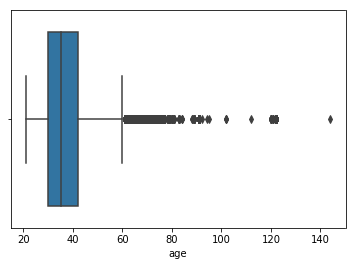

In [28]:
sb.boxplot(data=ford_clean, x='age')

> We can see there was an outlier in the age distribution with a rider with an age above 140 which is practically impossible hence the need to remove the outlier.

### 4. What is the distribution of  'trip duration in minutes'?

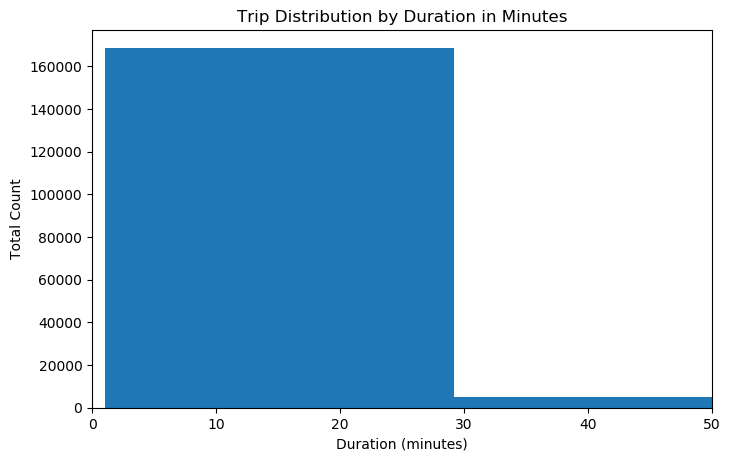

In [29]:
plt.figure(figsize = (8, 5), dpi = 100)

plt.hist(data = ford_clean, x = "duration_min", bins=50)
plt.xlim(0, 50)
plt.title("Trip Distribution by Duration in Minutes")
plt.xlabel('Duration (minutes)')
plt.ylabel('Total Count')
plt.show()

In [30]:
len(ford_clean[ford_clean["duration_min"] <= 30]) / len(ford_clean["duration_min"]) * 100

96.5607709543189

In [31]:
len(ford_clean[ford_clean["duration_min"] > 60]) / len(ford_clean["duration_min"]) * 100

0.7922172938863232

<b>Graph Conclusion:</b> From the distribution of trip duration we can see 96.6% of the trips took less than half an hour with 0.8% taking more than an hour which might be considered an outlier in the distribution of trip duaration.

###  5. What is the distribution of  'trip duration over day hours'?

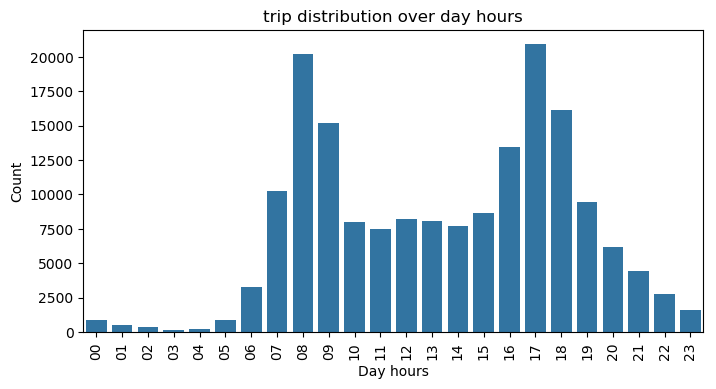

In [32]:
plt.figure(figsize = (8,4), dpi = 100)

hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_category = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
ford_clean['start_hourofday'] = ford_clean['start_hourofday'].astype(hour_category)


sb.countplot(data = ford_clean, x = "start_hourofday", color = base_color)
plt.title("trip distribution over day hours")
plt.xlabel('Day hours')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

<b> Graph conclusion</b> From the graph above we can see that the peak hours are from 7-9am and 4-6pm. It can be right to assume thatr these are when people report to work or school and also leave work respetively.

### 6. What is the distribution of  'bike share for all trip'?

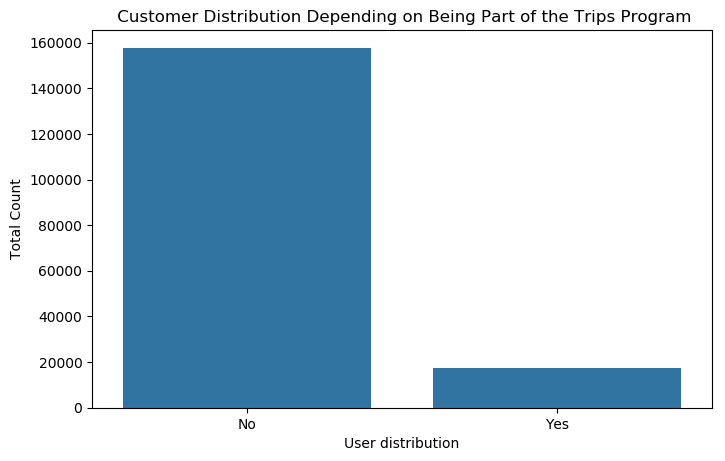

In [33]:
plt.figure(figsize = (8,5), dpi = 100)

sb.countplot(data=ford_clean, x='bike_share_for_all_trip', color=base_color)

plt.xlabel('User distribution')
plt.ylabel('Total Count')
plt.title(" Customer Distribution Depending on Being Part of the Trips Program")

plt.show()

<b>Graph Conclusion</b> Most of the riders were not part of the trips Program.

### Distribution(s) of  variable(s) of interest. 
1. Males represent 74.6 % of the riders, females follwing closely with a 23.3% whereas the rest represented 2.1% of the riders poppulation. This implies that there were more male riders than female riders
2. Most of the customers of Ford GoBike were their subscribers. The regular customers were not as many as the subscribers.
3. The distribution of age is skewed to the right. The active ages engaged in riding activities are between 20-50 as the population in the age bracket are actively riding to work or school or even for recretion. the slope of the distribution decreases with an increase in age, meaning the elderly rarely engage in cycling activities
4. 96.6% of the trips took less than half an hour with 0.8% taking more than an hour which might be considered an outlier in the distribution of trip duaration.
5. Peak hours are from 7-9am and 4-6pm. It can be right to assume thatr these are when people report to work or school and also leave work respetively.
6. Most of the riders were not part of the trips Program.


###  unusual distributions

1. The distribution of the trip duartion was one interesting one to look at. More than 96% of the trips took thirty minutes or less.There were some outliers in the distribution which I ommitted before proceding to the bivariate exploration.
2. The distribution of age also hd some outliers.
3. I created new columns from the time variable.

### Removing outliers

In [22]:
#remove outliers in both age and duration distribution
# droping ages more than 90 
df_clean1=ford_clean.drop(ford_clean[(ford_clean.age > 90 )].index, inplace = True)
# limit the duration to 1 hr/60mins
df_clean2=ford_clean[ford_clean['duration_min'] <= 60]
df_clean2.head()

,duration_min,user_type,member_gender,bike_share_for_all_trip,start_date,start_hourofday,start_dayofweek,start_month,age
4,26.416667,Subscriber,Male,Yes,2019-02-28,23,Thursday,February,48
5,29.883333,Subscriber,Male,No,2019-02-28,23,Thursday,February,63
6,19.116667,Subscriber,Female,No,2019-02-28,23,Thursday,February,39
7,26.916667,Subscriber,Male,No,2019-02-28,23,Thursday,February,33
8,26.166667,Subscriber,Other,No,2019-02-28,23,Thursday,February,34


In [35]:
df_clean2.to_csv('df_clean2.csv', index=False)

In [36]:
print(df_clean2['duration_min'].describe())

count    173399.000000
mean         10.311577
std           7.396104
min           1.016667
25%           5.366667
50%           8.450000
75%          13.000000
max          59.933333
Name: duration_min, dtype: float64


In [37]:
print(df_clean2['age'].describe())

count    173399.000000
mean         37.126771
std           9.892309
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max          89.000000
Name: age, dtype: float64


## Bivariate Exploration

> In this section, I tend to investigate relationships between pairs of variables in my
data. 

### Questions
1. What is the relation between the age and gender?
2. What is the relation between gender and trip duration in minutes?
3. What is the relation between the age and user type?
4. What is the relation between the age and trip duration in minutes ?
5. What is the relation between user type and trip duration in minutes?
6. What is the relation between gender and user types?
7. What is the distribution of start hour and user type?
8. What is the relation between weekday and number of trips depending on user types?

### 1. What is the relation between the age and gender?

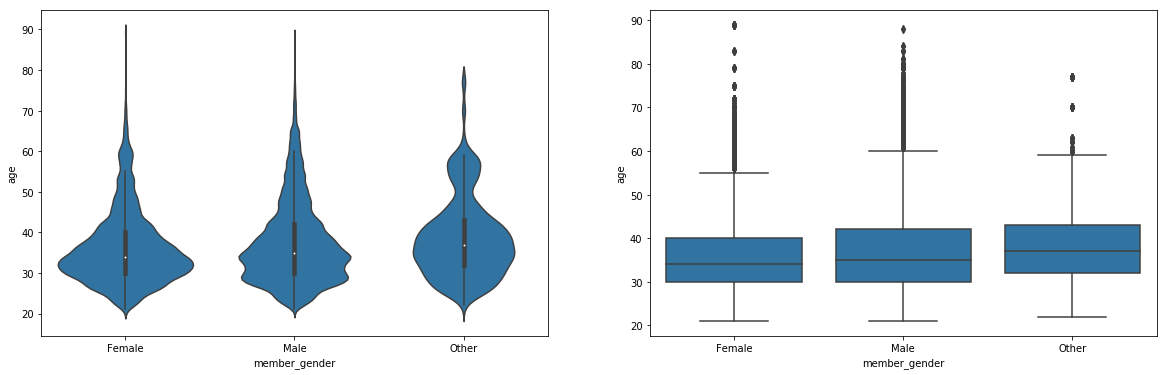

In [42]:
#plotting violinplots
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
sb.violinplot(data=df_clean2, x='member_gender', y='age', color=base_color, innner=None)

#plotting boxplots
plt.subplot(1,2,2)
sb.boxplot(data=df_clean2, x='member_gender', y='age', color=base_color)


> With a very minimal difference, the female gender are less engaged in trips than males and others gender.

### 2. What is the relation between gender and trip duration in minutes?

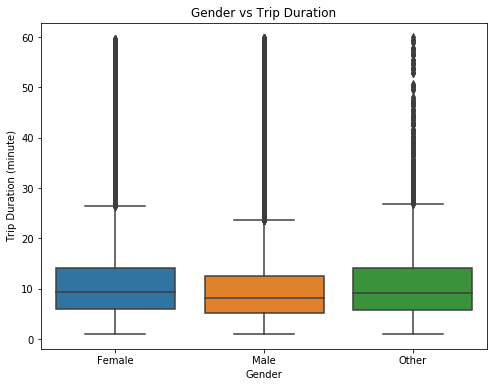

In [43]:
plt.figure(figsize = ([8
                       ,6]))
# plotting boxplot
sb.boxplot(data = df_clean2, x = "member_gender", y = "duration_min")
plt.xlabel('Gender');
plt.ylabel('Trip Duration (minute)')
plt.title("Gender vs Trip Duration")
plt.show()


> The males happened to be making shorter trips as compared to their female counterparts an other gender. This is evident from the shorter medians and shorter Interquartile Range.

### 3. What is the relation between the age and user type?

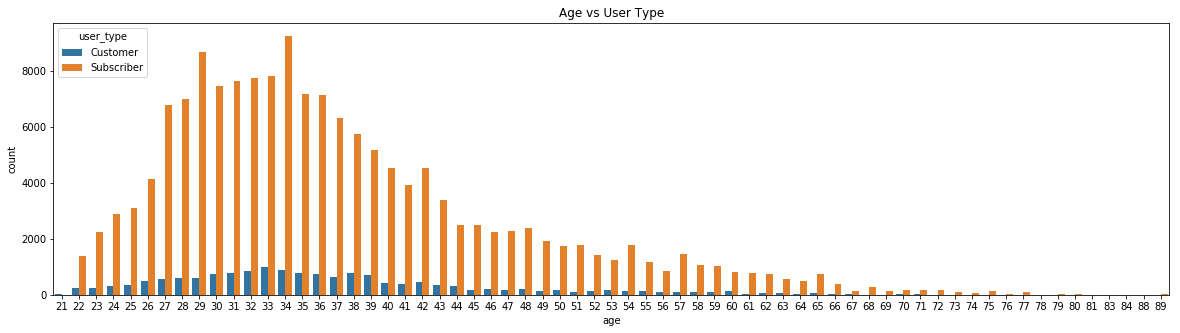

In [44]:
plt.figure(figsize = [20, 5]);

sb.countplot(data = df_clean2, x = 'age', hue = 'user_type');
plt.title('Age vs User Type');

> Irrrespective of the user type, the number of people aged between 25 and 50 is greater than that of 50 and 90.The subscribers still are the dominant user type.

### 4. What is the relation between the age and trip duration in minutes ?

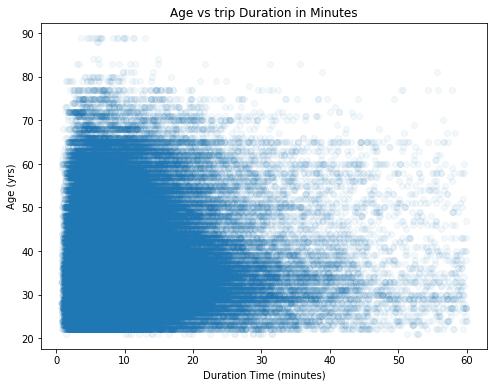

In [23]:

plt.figure(figsize = [8, 6])

sb.regplot(data = df_clean2, x = 'duration_min', y = 'age', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20}, fit_reg=False)
plt.xlabel('Duration Time (minutes)')
plt.title('Age vs trip Duration in Minutes')
plt.ylabel('Age (yrs)');


> There is a negative correlation between age and trip duartion. That is the older the clients the lesser the trip duaration.People in their 20-40's make longer trips than those in their 60's.

### 5. What is the relation between user type and trip duration in minutes?

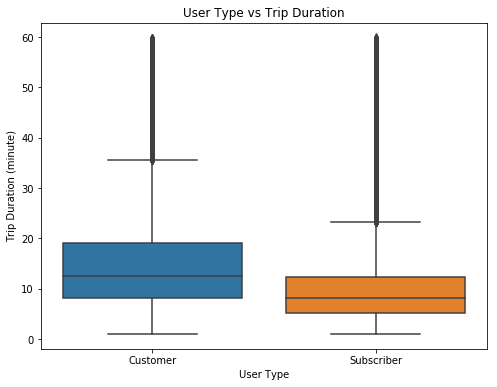

In [46]:
plt.figure(figsize = ([8,6]))
                       
# plotting boxplot
sb.boxplot(data = df_clean2, x = "user_type", y = "duration_min")
plt.xlabel('User Type');
plt.ylabel('Trip Duration (minute)')
plt.title("User Type vs Trip Duration")
plt.show()

> The subscribers make shorter trips as compared to the regular users (customers). Evident from the short median and IQR.

### 6. What is the relation between gender and user types?

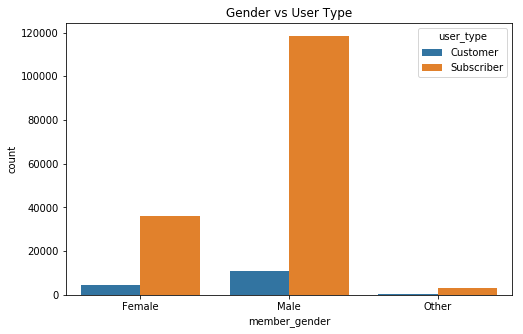

In [47]:
plt.figure(figsize = [8, 5]);

sb.countplot(data = df_clean2, x = 'member_gender', hue = 'user_type');
plt.title('Gender vs User Type');

> Irrespective of the gender, the subscriber user types often use Ford GoBike services. The male subscribers dominate the other genders.

### 7. What is the distribution of start hour and user type?

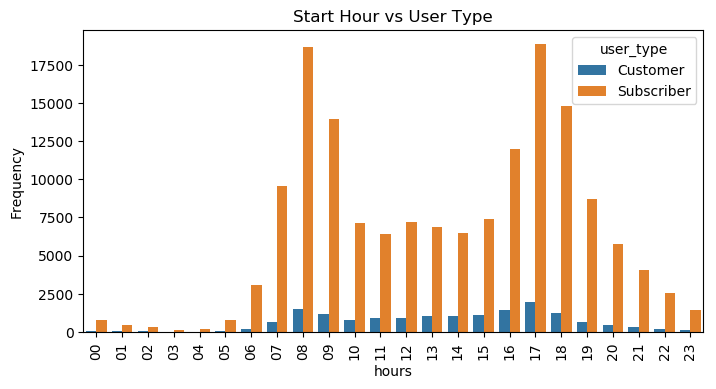

In [48]:

plt.figure(figsize = (8,4), dpi = 100)

sb.countplot(data = df_clean2, x = "start_hourofday", hue='user_type')
plt.title("Start Hour vs User Type")
plt.xlabel('hours')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)

plt.show()

> Irrespective of the time, the subscribers made more trips than the customers. It is even evident that during peak hours there were many subscribers than the customers. Many trips were made by both customers and su scribers between 7AM and 7PM.

### 8. What is the relation between weekday and number of trips depending on user types?

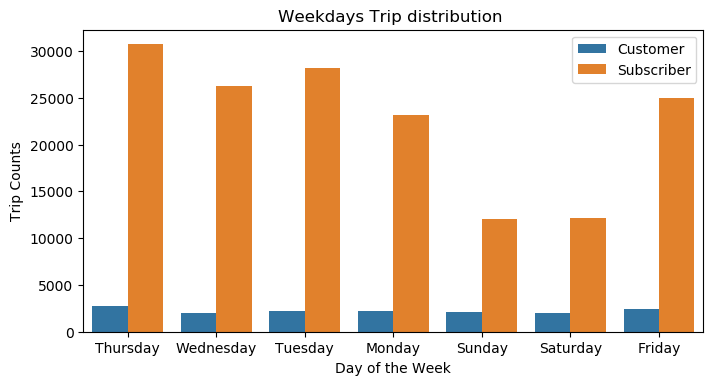

In [49]:
plt.figure(figsize = (8,4), dpi = 100)

sb.countplot(data=df_clean2, x='start_dayofweek', hue='user_type')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Counts')
plt.title("Weekdays Trip distribution ")
plt.legend()

plt.show()

> From the graph we can see that most trips were made on the weekdays than the weekend with Thursdays recording the highest number of trips. In America Saturday and Sunday are the weekend and many people tend to rest from work and school on these days thus the low recording of trips.

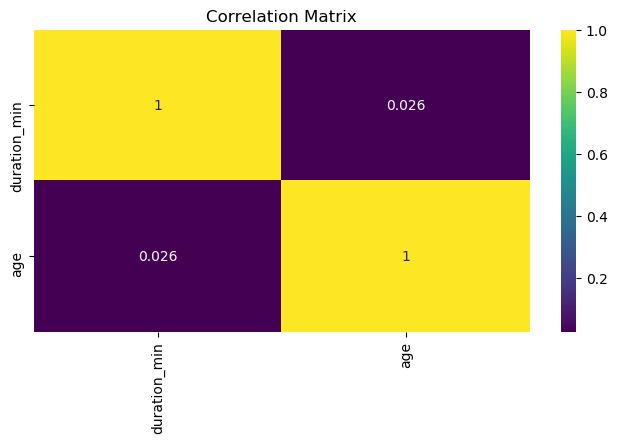

In [50]:
plt.figure(figsize = (8,4), dpi = 100)

sb.heatmap(df_clean2.corr(), cmap = "viridis", annot = True)
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. With a very minimal difference, the female gender are less engaged in trips than males and others gender.
2. The males happened to be making shorter trips as compared to their female counterparts an other gender. This is evident from the shorter medians and shorter Interquartile Range.
3. Irrrespective of the user type, the number of people aged between 25 and 50 is greater than that of 50 and 90.The subscribers still are the dominant user type.
4. There is a negative correlation between age and trip duartion. That is the older the clients the lesser the trip duaration.People in their 20-40's make longer trips than those in their 60's.
5. The subscribers make shorter trips as compared to the regular users (customers). Evident from the short median and IQR.
6. Irrespective of the gender, the subscriber user types often use Ford GoBike services. The male subscribers dominate the other genders.
7. Irrespective of the time, the subscribers made more trips than the customers. It is even evident that during peak hours there were many subscribers than the customers. Many trips were made by both customers and su scribers between 7AM and 7PM.
8. Most trips were made on the weekdays than the weekend with Thursdays recording the highest number of trips. In America Saturday and Sunday are the weekend and many people tend to rest from work and school on these days thus the low recording of trips.
### Were there any interesting or surprising interactions between features?

> It is still interesting on how many subscribers make more trips than the normal customers.

## Multivariate Exploration

> I created plots of three or more variables to investigate the Ford GoBike data set.

### Questions
1. What is the correlation between all the numeric variables of the dataset?
2. What is the distribution of trips over weekday by user types?
3. What is the correlation between Age and trip duration for each user type?

In [51]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173399 entries, 4 to 183411
Data columns (total 9 columns):
duration_min               173399 non-null float64
user_type                  173399 non-null category
member_gender              173399 non-null category
bike_share_for_all_trip    173399 non-null category
start_date                 173399 non-null object
start_hourofday            173399 non-null category
start_dayofweek            173399 non-null object
start_month                173399 non-null object
age                        173399 non-null int64
dtypes: category(4), float64(1), int64(1), object(3)
memory usage: 13.6+ MB


### 1. What is the correlation between all the numeric variables of the dataset?

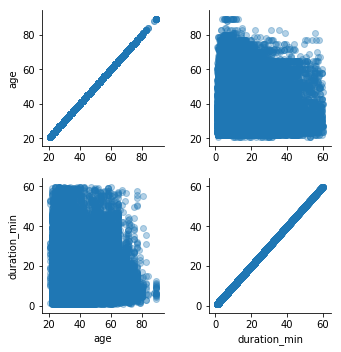

In [52]:
plt.figure(figsize = (8,4), dpi = 100)

plot_data = ['age', 'duration_min']
g = sb.PairGrid(data = df_clean2, vars = plot_data ) ;
g.map(plt.scatter, alpha = 1/3);


> There was a negative correlation between the age and trip duration.i.e. The older the rider, the shorter the trip

### 2. What is the distribution of trips over weekday by user types?

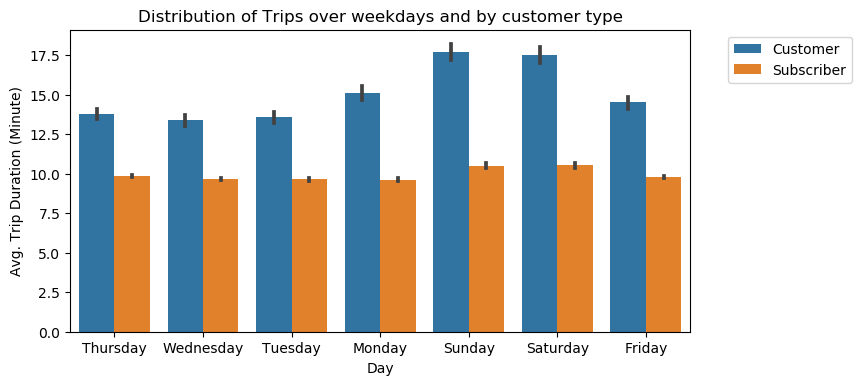

In [53]:
plt.figure(figsize = (8,4), dpi = 100)

sb.barplot(data = df_clean2, x = "start_dayofweek", y = "duration_min", hue='user_type')
plt.xlabel('Day');
plt.ylabel('Avg. Trip Duration (Minute)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Distribution of Trips over weekdays and by customer type")

plt.show()


> The relation between customer and subscriber is constant. From the above plot we can conclude that customers make longer trips than subscribers.

### 3. What is the correlation between Age and trip duration for each user type?

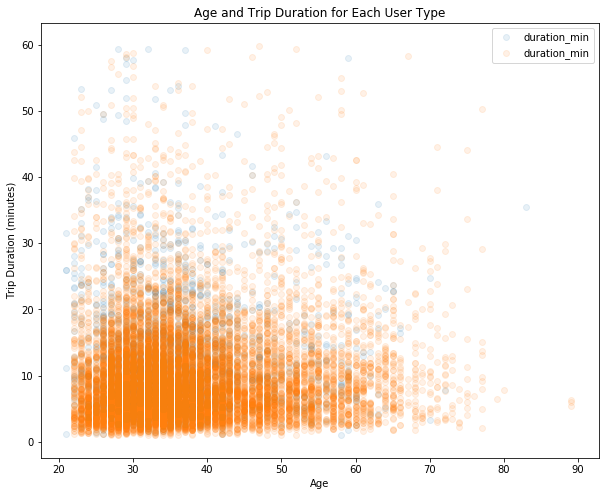

In [37]:
# plotting a scatterplot  
sample = df_clean2.sample(15000, random_state=1)

plt.figure(figsize = [10, 8]);
user_type_markers = [['Customer', 'o'],
               ['Subscriber', 'x']]

for cat, marker in user_type_markers:
    df_cat = sample[sample['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'duration_min', alpha=2/20);
plt.legend(['Customer','Subscriber']);
plt.xlabel('Age');
plt.ylabel('Trip Duration (minutes)');
plt.legend()
plt.title("Age and Trip Duration for Each User Type");


> We can notice that a majroity of the old users are subscribers.

> There are more younger subscribers than younger customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. There was a negative correlation between the age and trip duration.i.e. The older the rider, the shorter the trip.
2. The relation between customer and subscriber is constant. From the above plot we can conclude that customers make longer trips than subscribers.
3. We can notice that a majroity of the old users are subscribers.
4. There are more younger subscribers than younger customers.

### Were there any interesting or surprising interactions between features?

> No.

## Conclusions
1. There were more male riders than females.
2. The subscribers were more than the customers.
3. There were many aged females than males.
4. Most of the trips took less than 30 minutes.

## Limitations
1. We got missing values in the dataset which had to be cleaned.
2. The age column had an outlier of more than 100 years old.
3. Some features had the wrong data type in the dataset.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

